In [622]:
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
from PIL import ImageEnhance
import pytesseract
from autocorrect import spell
from textblob import TextBlob
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [623]:
image_input = "check.jpg" #best.jpg;check.jpg;qwerty.jpg;text.jpg

In [624]:
img_save = "filtered.jpg"

In [625]:
img = cv2.imread(image_input, -1)
size_tup = img.shape
print (size_tup)
print (img[0])

(350, 1776, 3)
[[224 225 223]
 [224 225 223]
 [225 226 224]
 ...
 [221 224 222]
 [222 225 223]
 [225 228 226]]


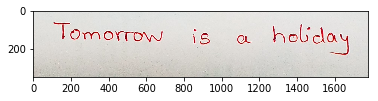

In [626]:
plt.imshow(img)

In [627]:
sumbg = 0.0
sumbr = 0.0
sq_sum = 0.0
count = 0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        sumbg = sumbg + img[i][j][0] - img[i][j][1]
        sumbr = sumbr + img[i][j][0] - img[i][j][2]
        count = count + 1
meanbg = (sumbg / (count))
meanbr = (sumbr / (count))
print(meanbg)
print(meanbr)

sumbg = 0.0
sumbr = 0.0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        posg = img3[i][j][0] - meanbg
        posr = img3[i][j][0] - meanbr
        if(0 <= posg):
            sumbg = sumbg + posg
        else:
            sumbg = sumbg - posg
        if(0 <= posr):
            sumbr = sumbr + posr
        else:
            sumbr = sumbr - posr
standard_deviationg = math.sqrt(sumbg / count)
standard_deviationr = math.sqrt(sumbr / count)
print (standard_deviationg)
print (standard_deviationr)

6.355185006435007
10.13709942084942


IndexError: index 1067 is out of bounds for axis 0 with size 1067

In [ ]:
#Filters which has r greater in r b g

In [ ]:
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        if(not(((img[i][j][0] - standard_deviationg) > img[i][j][1]) or ((img[i][j][0] - standard_deviationg) > img[i][j][2]))):
            for k in range(size_tup[2]):
                img[i][j][k] = 255


In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite(img_save, img)

In [ ]:
from PIL import Image, ImageEnhance 
im = Image.open(img_save)
enhancer = ImageEnhance.Color(im)
enhanced_im = enhancer.enhance(0.0)

enhancer = ImageEnhance.Sharpness(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(0.5)

enhancer = ImageEnhance.Brightness(enhanced_im)
enhanced_im = enhancer.enhance(1.5)

enhancer = ImageEnhance.Contrast(enhanced_im)
enhanced_im = enhancer.enhance(2.0)

enhanced_im.save(img_save)

In [628]:
img = cv2.imread(img_save, -1)

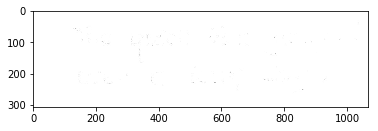

In [629]:
plt.imshow(img)

In [630]:
img = cv2.GaussianBlur(img,(5,5),0)

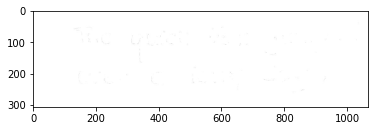

In [631]:
plt.imshow(img)

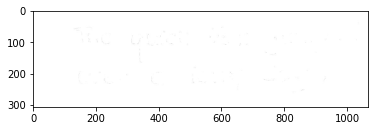

In [633]:
size_tup = img.shape
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
my_mask= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = img
plt.imshow(img2)

In [634]:

print (size_tup)

(306, 1067, 3)


In [635]:
sum = 0.0
sq_sum = 0.0
count = 0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        for k in range(size_tup[2]):
            if(img[i][j][k] != 0):
                sum = sum + ((img3[i][j][k]))
                count = count + 1
mean = (sum / (count))
print(mean)

sum = 0.0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        for k in range(size_tup[2]):
            if(img[i][j][k] != 0):
                pos = img3[i][j][k] - mean
                if(0 <= pos):
                    sum = sum + pos
                else:
                    sum = sum - pos
standard_deviation = math.sqrt(sum / count)
print (standard_deviation)

254.8611708350944
0.5152208200139199


In [636]:
avg = mean - standard_deviation

In [637]:
BLACK = 255
WHITE = 0
i = size_tup[0] - 1
while i >= 0:
    j = size_tup[1] - 1
    while j >= 0:
        if my_mask[i][j] == BLACK or my_mask[i][j] == WHITE:
            j = j - 1
            continue
        elif my_mask[i][j] > avg:
            my_mask[i][j] = BLACK
        else:
            my_mask[i][j] = WHITE
        j = j - 1
    i = i - 1
    
print (i)

-1


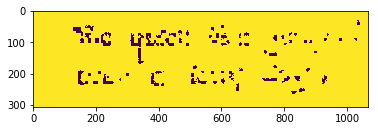

In [638]:
plt.imshow(my_mask)

In [639]:
BLACK = 0
WHITE = 255
i = size_tup[0] - 1
while i >= 0:
    j = size_tup[1] - 1
    while j >= 0:
        k = size_tup[2] - 1
        while k >= 0:
            if my_mask[i][j] == BLACK:
                img3[i][j][k] = BLACK
            else:
                img3[i][j][k] = img2[i][j][k]
            k = k - 1
        j = j - 1
    i = i - 1
    
print (i)

-1


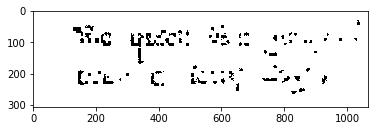

In [640]:
plt.imshow(img3)

In [641]:
print(pytesseract.image_to_string(img3))

In [642]:
strout = pytesseract.image_to_string(img3)

In [643]:
print(strout)

In [644]:
spell(strout)

'a'

In [645]:
b = TextBlob(strout)

In [646]:
print (b.correct())

In [647]:
file = open('textoutput.txt','w') 
file.write(strout)  
file.close()